# Un premier TP sur pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 80

Dans ce TP, nous allons étudier les données sur les passagers du Titanic, un énorme paquebot pour l’époque qui fait naufrage en 1912 à la suite d’une collision avec un iceberg, lors de son voyage inaugural de Southampton à New York. Les données sont stockées dans un fichier `csv`.
L'objectif est de proposer une hypothèse qui explique pourquoi certains passagers sont décédés et d'autres non !

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [3]:
print(titanic.shape)
titanic.describe(include='all')

(891, 12)


PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

Les colonnes sont :
- `PassengerId` : Identifiant du passager Survived : True (1) / False (0)
- `Pclass` : Classe du ticket : 1, 2 ou 3. Name : Nom du passager
- `Sex` : Genre du passager (male/female)
- `Age` : Age en années
- `Cabin` : Numéro de cabine
- `Embarked` : Port d’embarquement ( C : Cherbourg; Q Queenstown; S Southampton)

On va commencer par observer nos données, en répondant à des questions descriptives :
1. Quel sexe a le plus de chances de survie ?
2. Est-ce que les enfants ont eu plus de chances de survie ?
3. Quelle est la proportion de survie selon le port d'embarquement ?

## Quel sexe a le plus de chance de survie ?

__Question__

> - Fabriquez une table de synthèse à l'aide de la commande `groupby` en regroupant les passagers selon leur sexe puis selon s'ils ont survécu ou pas. Vous pourrez présenter les résultats sous la forme d'un pourcentage.
> - Proposez une représentation graphique type camembert pour représenter la répartition de la survie selon le sexe. Vous pourrez utiliser la commande `plot` directement sur le `DataFrame` avec l'option `kind` bien choisie (regardez dans l'aide).
> - Calculez le pourcentage de survie pour les femmes et pour les hommes. Qu'en concluez-vous ?

_Vous pourrez essayer d'obtenir un DataFrame tel que celui-ci :_
```
Sex     Survived
female  0            9.090909
        1           26.150393
male    0           52.525253
        1           12.233446
Name: PassengerId, dtype: float64
```


In [4]:
####################################################################
# Première méthode avec groupby
####################################################################
analyse_sex = titanic.groupby(["Sex", "Survived"]).count()["PassengerId"]
tot = analyse_sex.sum()
analyse_sex = analyse_sex * 100/tot
display(analyse_sex)

Sex     Survived
female  0            9.090909
        1           26.150393
male    0           52.525253
        1           12.233446
Name: PassengerId, dtype: float64

In [5]:
####################################################################
# Deuxième méthode avec des masques
####################################################################
maskf = titanic["Sex"] == "female"
ftot = maskf.sum()
fs = titanic.loc[maskf, "Survived"].sum()
fm = ftot - fs
maskm = titanic["Sex"] == "male"
mtot = maskm.sum()
ms = titanic.loc[maskm, "Survived"].sum()
mm = mtot - ms
index = pd.MultiIndex.from_product(
    [["female", "male"], [0, 1]], names=["Sex", "Survived"]
)
analyse_sex2 = pd.Series(
    (fm, fs, mm, ms),
    index=index
)
display(analyse_sex2)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

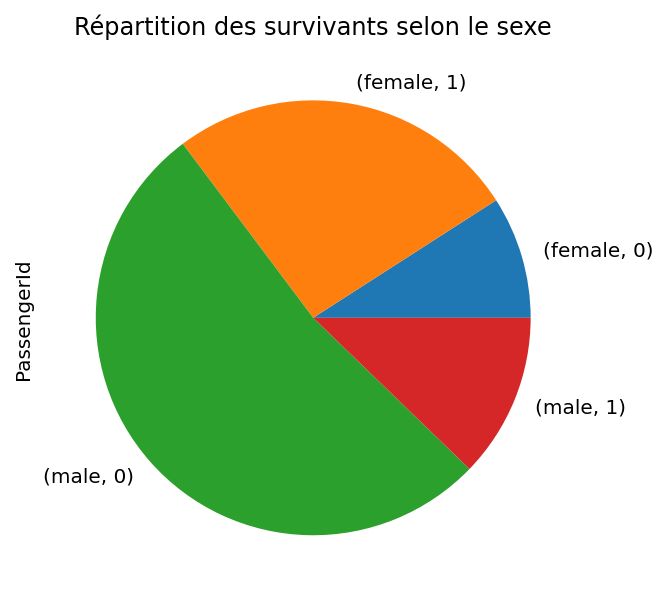

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
analyse_sex.plot(kind='pie', ax=ax, legend=False)
ax.set_title("Répartition des survivants selon le sexe")
plt.show()

In [7]:
ftot = analyse_sex["female"].sum()
fs = analyse_sex[("female", 1)]
print(f"Pourcentage de survivantes : {100*fs/ftot:4.2f}%")
mtot = analyse_sex["male"].sum()
ms = analyse_sex[("male", 1)]
print(f"Pourcentage de survivants :  {100*ms/mtot:4.2f}%")

Pourcentage de survivantes : 74.20%
Pourcentage de survivants :  18.89%


__Question__

> Le graphique obtenu directement en utilisant la commande `plot` du `DataFrame` n'est pas très joli et peut être amélioré. Essayez d'obtenir un graphique ressemblant à celui-ci.

![TP08_titanic.png](TP08_titanic.png)

_Indications : vous pourrez utiliser directement la commande `pie` de `pyplot` en paramétrant les arguments suivants `radius`, `colors`, `autopct`, `textprops`, `pctdistance`, `labeldistance`, `wedgeprops`, `labels`._

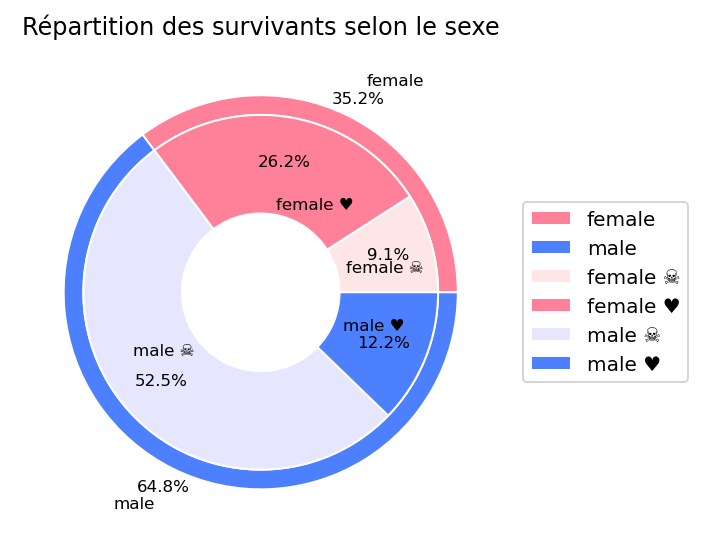

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))

vals = analyse_sex2.to_numpy().reshape((2, 2))
f = lambda x: u"\u2620" if x == 0 else u"\u2665"
labels = [f"{x[0]} {f(x[1])}" for x in analyse_sex2.index.to_list()]

#cmap = plt.colormaps["tab20c"]
#outer_colors = cmap([0, 4])
#inner_colors = cmap([3, 1, 7, 5])
outer_colors = [
    (1, 0.5, 0.6),
    (0.3, 0.5, 1)
]
inner_colors = [
    (1, 0.9, 0.9),
    (1, 0.5, 0.6),
    (0.9, 0.9, 1),
    (0.3, 0.5, 1)
]
size_ext = 0.1
size_int = 0.5

ax.pie(
    vals.sum(axis=1),
    radius=1, colors=outer_colors,
    autopct='%.1f%%', textprops={'size': 'small'},
    pctdistance=1.1, labeldistance=1.2,
    wedgeprops=dict(width=size_ext, edgecolor='w'),
    labels=analyse_sex2.index.levels[0]
)

ax.pie(
    vals.flatten(),
    radius=1-size_ext, colors=inner_colors,
    wedgeprops=dict(width=size_int, edgecolor='w'),
    autopct='%.1f%%', textprops={'size': 'small'},
    pctdistance=.75, labeldistance=0.5,
    labels=labels
)

ax.legend(loc='center', bbox_to_anchor=(1.2, 0.5))

ax.set_title("Répartition des survivants selon le sexe")
fig.tight_layout()
fig.savefig("TP08_titanic.png")
plt.show()

## Et les enfants ?

__Question__

> - Créez un nouveau `DataFrame` en filtrant les passagers dont on ne connait pas l'âge.
> - Calculez le pourcentage de survie pour les enfants (sans différenciation du sexe). Qu'en concluez-vous ?

In [9]:
titanic_age = titanic.loc[titanic["Age"].notna()]
titanic_age.head(10)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S

In [10]:
etot = len(titanic_age[titanic_age["Age"] < 18])
es = len(titanic_age[(titanic_age["Age"] < 18) * (titanic_age["Survived"] == 1)])
print(f"Pourcentage d'enfants survivants : {100*es/etot:4.2f}%")

Pourcentage d'enfants survivants : 53.98%


## Recherche d'une corrélation avec le port d'embarquement

Nous pouvons nous demander si les chances de survie dépendent du port d'embarquement. Un problème est que ce port n'est pas renseigné pour certains passagers. 

__Question__

> 1. Affichez tous les ports d'embarquement possibles
> 2. Comptez et affichez le nombre de passagers ayant embarqué dans chacun des ports ou n'ayant pas cette information.

In [6]:
####################################################################
# Première méthode avec groupby
####################################################################
titanic_by_port = titanic.groupby(["Embarked"]).count()
display(titanic_by_port)
for port in titanic_by_port.index:
    rep = titanic_by_port.at[port, "PassengerId"]
    print(f"Nombre de passagers ayant embarqué à {port} : {rep}")

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked                                                                        
C                 168       168     168   168  168  130    168    168     168   
Q                  77        77      77    77   77   28     77     77      77   
S                 644       644     644   644  644  554    644    644     644   

          Fare  Cabin  
Embarked               
C          168     69  
Q           77      4  
S          644    129

Nombre de passagers ayant embarqué à C : 168
Nombre de passagers ayant embarqué à Q : 77
Nombre de passagers ayant embarqué à S : 644


In [7]:
####################################################################
# Deuxième méthode avec des masques
####################################################################
ports = titanic["Embarked"].unique()
repartition = [
    (titanic['Embarked'] == port).sum() for port in ports[:-1]
]
repartition.append(len(titanic) - sum(repartition))
for port, rep in zip(ports, repartition):
    print(f"Nombre de passagers ayant embarqué à {port} : {rep}")


Nombre de passagers ayant embarqué à S : 644
Nombre de passagers ayant embarqué à C : 168
Nombre de passagers ayant embarqué à Q : 77
Nombre de passagers ayant embarqué à nan : 2


__Question__

> - Trouvez le nom des deux passagères dont le nom du port d'embarquement n'est pas donné.
> - Complétez l'information manquante dans le `DataFrame` afin que tous les passagers aient un port d'embarquement.

On peut retrouver la trace de ces deux personnes sur internet 
- https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
- https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

et il est indiqué qu'elles sont montées à Southampton.

In [8]:
display(titanic.loc[titanic["Embarked"].isna(), "Cabin"])
display(titanic.loc[titanic["Cabin"] == "B28"])
titanic.at[61, "Embarked"] = 'S'
titanic.at[829, "Embarked"] = 'S'
display(titanic.loc[titanic["Cabin"] == "B28"])

61     B28
829    B28
Name: Cabin, dtype: object

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28        S  
829  female  62.0      0      0  113572  80.0   B28        S

__Question__

> Calculez la proportion de survie selon le port d'embarquement.

In [18]:
####################################################################
# Première méthode avec groupby
####################################################################
titanic_by_port = titanic.groupby(["Embarked", "Survived"])["PassengerId"].count()
display(titanic_by_port)
for port in titanic_by_port.index.levels[0]:
    rep_dead = titanic_by_port.at[(port, 0)]
    rep_live = titanic_by_port.at[(port, 1)]
    s = f"Nombre de passagers ayant embarqué à {port} :"
    s += f"{rep_dead:3d} morts et {rep_live:3d} vivants"
    s += " -- "
    s += f"({100*rep_live/(rep_live+rep_dead):4.2f}% de survie)"
    print(s)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: PassengerId, dtype: int64

Nombre de passagers ayant embarqué à C : 75 morts et  93 vivants -- (55.36% de survie)
Nombre de passagers ayant embarqué à Q : 47 morts et  30 vivants -- (38.96% de survie)
Nombre de passagers ayant embarqué à S :427 morts et 219 vivants -- (33.90% de survie)


In [17]:
####################################################################
# Deuxième méthode avec des masques
####################################################################
ports = titanic["Embarked"].unique()
rep_tot = [
    (titanic['Embarked'] == port).sum() for port in ports
]
rep_live = [
    ((titanic['Embarked'] == port) * (titanic['Survived'] == 1)).sum() for port in ports
]
for k, port in enumerate(ports):
    s = f"Nombre de passagers ayant embarqué à {port} :"
    s += f"{rep_tot[k]-rep_live[k]:3d} morts et {rep_live[k]:3d} vivants"
    s += " -- "
    s += f"({100*rep_live[k]/rep_tot[k]:4.2f}% de survie)"
    print(s)

Nombre de passagers ayant embarqué à S :427 morts et 219 vivants -- (33.90% de survie)
Nombre de passagers ayant embarqué à C : 75 morts et  93 vivants -- (55.36% de survie)
Nombre de passagers ayant embarqué à Q : 47 morts et  30 vivants -- (38.96% de survie)


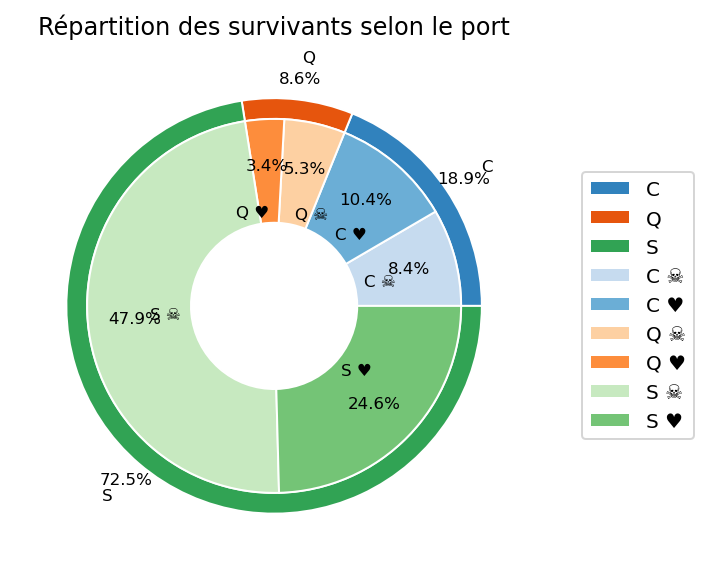

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))

vals = titanic_by_port.to_numpy().reshape((len(titanic_by_port)//2, 2))
f = lambda x: u"\u2620" if x == 0 else u"\u2665"
labels = [f"{x[0]} {f(x[1])}" for x in titanic_by_port.index.to_list()]

cmap = plt.colormaps["tab20c"]
outer_colors = cmap([0, 4, 8])
inner_colors = cmap([3, 1, 7, 5, 11, 9])
size_ext = 0.1
size_int = 0.5

ax.pie(
    vals.sum(axis=1),
    radius=1, colors=outer_colors,
    autopct='%.1f%%', textprops={'size': 'small'},
    pctdistance=1.1, labeldistance=1.2,
    wedgeprops=dict(width=size_ext, edgecolor='w'),
    labels=titanic_by_port.index.levels[0]
)

ax.pie(
    vals.flatten(),
    radius=1-size_ext, colors=inner_colors,
    wedgeprops=dict(width=size_int, edgecolor='w'),
    autopct='%.1f%%', textprops={'size': 'small'},
    pctdistance=.75, labeldistance=0.5,
    labels=labels
)

ax.legend(loc='center', bbox_to_anchor=(1.2, 0.5))

ax.set_title("Répartition des survivants selon le port")
fig.tight_layout()
fig.savefig("TP08_titanic_2.png")
plt.show()

## Et une corrélation avec la classe de la cabine ?

__Question__

> Proposez un graphique type camembert pour les survivants/morts selon les trois classes de la cabine occupée.

In [33]:
####################################################################
# Première méthode avec groupby
####################################################################
titanic_by_cabine = titanic.groupby(["Pclass"])["PassengerId"].count()
display(titanic_by_cabine)
tot = 0
for cabine in titanic_by_cabine.index:
    rep = titanic_by_cabine.at[cabine]
    tot += rep
    print(f"Nombre de passagers en cabine de classe {cabine} : {rep}")
print(f"Passagers sans cabine : {titanic.shape[0]-tot}")

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

Nombre de passagers en cabine de classe 1 : 216
Nombre de passagers en cabine de classe 2 : 184
Nombre de passagers en cabine de classe 3 : 491
Passagers sans cabine : 0


In [35]:
####################################################################
# Première méthode avec groupby
####################################################################
titanic_by_cabine = titanic.groupby(["Pclass", "Survived"])["PassengerId"].count()
display(titanic_by_cabine)
for cabine in titanic_by_cabine.index.levels[0]:
    rep_dead = titanic_by_cabine.at[(cabine, 0)]
    rep_live = titanic_by_cabine.at[(cabine, 1)]
    s = f"Nombre de passagers en cabine de classe {cabine} : "
    s += f"{rep_dead:3d} morts et {rep_live:3d} vivants"
    s += " -- "
    s += f"({100*rep_live/(rep_live+rep_dead):4.2f}% de survie)"
    print(s)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

Nombre de passagers en cabine de classe 1 :  80 morts et 136 vivants -- (62.96% de survie)
Nombre de passagers en cabine de classe 2 :  97 morts et  87 vivants -- (47.28% de survie)
Nombre de passagers en cabine de classe 3 : 372 morts et 119 vivants -- (24.24% de survie)


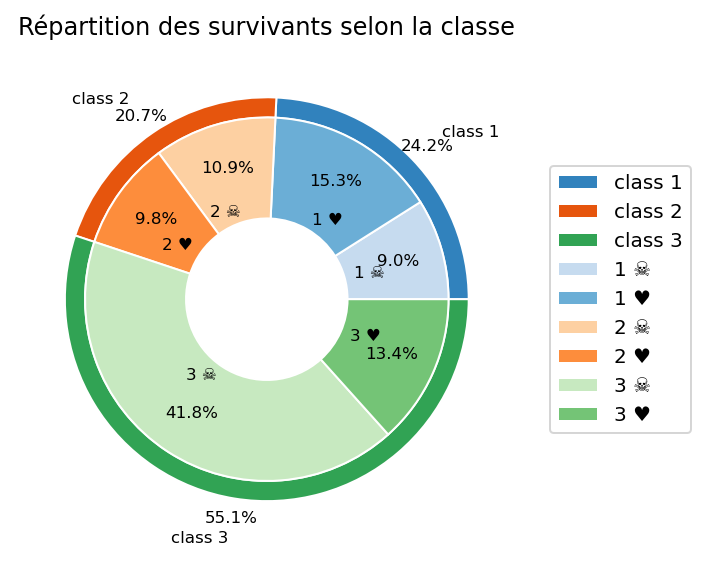

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))

vals = titanic_by_cabine.to_numpy().reshape((len(titanic_by_cabine)//2, 2))
f = lambda x: u"\u2620" if x == 0 else u"\u2665"
labels = [f"{x[0]} {f(x[1])}" for x in titanic_by_cabine.index.to_list()]

cmap = plt.colormaps["tab20c"]
outer_colors = cmap([0, 4, 8])
inner_colors = cmap([3, 1, 7, 5, 11, 9])
size_ext = 0.1
size_int = 0.5

ax.pie(
    vals.sum(axis=1),
    radius=1, colors=outer_colors,
    autopct='%.1f%%', textprops={'size': 'small'},
    pctdistance=1.1, labeldistance=1.2,
    wedgeprops=dict(width=size_ext, edgecolor='w'),
    labels=[f"class {num}" for num in titanic_by_cabine.index.levels[0]]
)

ax.pie(
    vals.flatten(),
    radius=1-size_ext, colors=inner_colors,
    wedgeprops=dict(width=size_int, edgecolor='w'),
    autopct='%.1f%%', textprops={'size': 'small'},
    pctdistance=.75, labeldistance=0.5,
    labels=labels
)

ax.legend(loc='center', bbox_to_anchor=(1.2, 0.5))

ax.set_title("Répartition des survivants selon la classe")
fig.tight_layout()
fig.savefig("TP08_titanic_3.png")
plt.show()